In [112]:
# Import necessary libraries
import sqlite3
import pandas as pd


# Connect to a SQLite database (or create one)
conn = sqlite3.connect(r'C:\Users\spiri\codingbootcamp\Final-project-C4Y\data.db')
cursor = conn.cursor()

WITH mean_deposite as (
    select client_id, AVG(balance), currency
    from balances
    group by 1
)
Select * 
from inv_campaign_eval
left join client
on inv_campaign_eval.client_id = client.client_id
left join client_products
on inv_campaign_eval.client_id = client_products.client_id
left join mean_deposite
on inv_campaign_eval.client_id = mean_deposite.client_id

In [113]:
query = ('''
WITH mean_deposite as (
    select client_id, AVG(balance) as mean_balance, currency
    from balances
    group by 1
)
Select * 
from inv_campaign_eval
left join client
on inv_campaign_eval.client_id = client.client_id
left join client_products
on inv_campaign_eval.client_id = client_products.client_id
left join mean_deposite
on inv_campaign_eval.client_id = mean_deposite.client_id''')
df = pd.read_sql_query(query, conn)

df.head()

,client_id,poutcome,client_id,age,job,marital,education,gender,client_id,has_deposits,loan,has_insurance,has_mortgage,client_id,mean_balance,currency
0,249789938,success,249789938,38.0,services,married,secondary,M,249789938,yes,no,n,no,249789938,2669.532734,CZK
1,1504633819,failure,1504633819,38.0,management,married,tertiary,M,1504633819,no,yes,n,yes,1504633819,5440.862334,CZK
2,1952195738,success,1952195738,34.0,services,married,secondary,M,1952195738,yes,yes,n,no,1952195738,2922.958852,CZK
3,989726384,success,989726384,62.0,retired,married,secondary,F,989726384,yes,no,n,no,989726384,3124.614843,CZK
4,1971878545,failure,1971878545,36.0,management,single,tertiary,M,1971878545,yes,no,n,no,1971878545,474.083033,CZK


In [29]:
print(df.columns)
print(df.dtypes)


Index(['client_id', 'poutcome', 'age', 'job', 'marital', 'education', 'gender',
       'has_deposits', 'loan', 'has_insurance', 'has_mortgage', 'mean_balance',
       'currency'],
      dtype='object')
client_id        object
poutcome         object
age              object
job              object
marital          object
education        object
gender           object
has_deposits     object
loan             object
has_insurance    object
has_mortgage     object
mean_balance     object
currency         object
dtype: object


Here we drop duplicate columns

In [114]:
df = df.T.drop_duplicates().T

In [79]:
df.head()

,client_id,poutcome,age,job,marital,education,gender,has_deposits,loan,has_insurance,has_mortgage,mean_balance,currency
0,249789938,success,38.0,services,married,secondary,M,yes,no,n,no,2669.532734,CZK
1,1504633819,failure,38.0,management,married,tertiary,M,no,yes,n,yes,5440.862334,CZK
2,1952195738,success,34.0,services,married,secondary,M,yes,yes,n,no,2922.958852,CZK
3,989726384,success,62.0,retired,married,secondary,F,yes,no,n,no,3124.614843,CZK
4,1971878545,failure,36.0,management,single,tertiary,M,yes,no,n,no,474.083033,CZK


checking and dealing with the missing value

In [80]:
df.isna().sum()

client_id         0
poutcome          0
age              50
job              83
marital           0
education         0
gender            0
has_deposits      0
loan              0
has_insurance     0
has_mortgage      0
mean_balance      0
currency          0
dtype: int64

In [115]:
df.job.fillna(value='unknown', inplace=True)

C:\Users\spiri\AppData\Local\Temp\ipykernel_12160\1783974414.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.job.fillna(value='unknown', inplace=True)


In [116]:
df.age.fillna(value=df.age.mean(), inplace=True)


C:\Users\spiri\AppData\Local\Temp\ipykernel_12160\2420278621.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.age.fillna(value=df.age.mean(), inplace=True)
C:\Users\spiri\AppData\Local\Temp\ipykernel_12160\2420278621.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.age.fillna(value=df.age.mean(), in

So we fill the missing values, no we can focus on the data types

In [124]:
df.head()

,client_id,poutcome,age,job,marital,education,gender,has_deposits,loan,has_insurance,has_mortgage,mean_balance,currency
0,249789938,1,38.0,services,1,2,1,1,0,0,0,2669.532734,CZK
1,1504633819,0,38.0,management,1,3,1,0,1,0,1,5440.862334,CZK
2,1952195738,1,34.0,services,1,2,1,1,1,0,0,2922.958852,CZK
3,989726384,1,62.0,retired,1,2,0,1,0,0,0,3124.614843,CZK
4,1971878545,0,36.0,management,2,3,1,1,0,0,0,474.083033,CZK


In [118]:
df.mean_balance = pd.to_numeric(df.mean_balance)

In [119]:
df.client_id = pd.to_numeric(df.client_id)

In [120]:
df.mean_balance.sum()

3975208.4593620505

next part I want to focus on converting currency everyrhing to czk


In [121]:
rate = {'CZK': 1, 'USD': 23, 'EUR': 25}

df['mean_balance'] = df.apply(lambda row: row['mean_balance'] * rate[row['currency']], axis=1)

In [123]:
df.job.unique()

array(['services', 'management', 'retired', 'admin.', 'student',
       'entrepreneur', 'blue-collar', 'technician', 'unknown',
       'housemaid', 'self-employed', 'unemployed'], dtype=object)

So here we can slowly start an feature engeniring

In [122]:
from sklearn.preprocessing import LabelEncoder
education_map = {'primary':1, 'secondary':2, 'tertiary':3,'unknown':0}
df.education = df.education.replace(education_map)

label_encoders = {}
for col in ['marital', 'has_deposits', 'poutcome', 'loan', "has_insurance", 'has_mortgage', 'gender']:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

C:\Users\spiri\AppData\Local\Temp\ipykernel_12160\342006815.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.education = df.education.replace(education_map)


In [125]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
ohe_result = ohe.fit_transform(df[['job', 'currency']])
ohe_df = pd.DataFrame(ohe_result.toarray(), columns=ohe.get_feature_names_out(['job', 'currency']))
df = pd.concat([df, ohe_df], axis=1)



In [136]:
df.drop(columns=['job', 'currency'], inplace=True)

In [137]:
df.dtypes

client_id              int64
poutcome               int32
age                  float64
marital                int32
education              int64
gender                 int32
has_deposits           int32
loan                   int32
has_insurance          int32
has_mortgage           int32
mean_balance         float64
job_admin.           float64
job_blue-collar      float64
job_entrepreneur     float64
job_housemaid        float64
job_management       float64
job_retired          float64
job_self-employed    float64
job_services         float64
job_student          float64
job_technician       float64
job_unemployed       float64
job_unknown          float64
currency_CZK         float64
currency_EUR         float64
currency_USD         float64
dtype: object

In [138]:
df.corr()


,client_id,poutcome,age,marital,education,gender,has_deposits,loan,has_insurance,has_mortgage,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,currency_CZK,currency_EUR,currency_USD
client_id,1.000000,-0.016025,0.010784,0.012018,0.001642,0.061402,0.003416,0.029182,-0.030156,0.009365,...,0.000656,0.022783,0.010605,-0.014860,-0.031700,0.014792,-0.030569,-0.000619,0.002926,-0.002312
poutcome,-0.016025,1.000000,0.099472,0.011491,0.038447,0.017411,0.443799,-0.151548,0.030916,-0.334935,...,0.119809,0.007055,-0.047407,0.061053,-0.032524,0.050778,0.014597,-0.006412,0.036337,-0.030618
age,0.010784,0.099472,1.000000,-0.458919,-0.231512,0.009155,0.071944,-0.038324,0.237297,-0.160519,...,0.597871,-0.021582,-0.062227,-0.252811,-0.086374,-0.011616,0.016253,-0.004768,0.021750,-0.016944
marital,0.012018,0.011491,-0.458919,1.000000,0.167479,0.007776,0.030323,-0.058563,-0.053568,-0.055662,...,-0.193668,0.000041,-0.053386,0.245764,0.044071,-0.003464,-0.007926,-0.008782,0.013720,-0.002102
education,0.001642,0.038447,-0.231512,0.167479,1.000000,0.000294,0.063622,-0.006615,-0.149686,-0.035277,...,-0.159832,0.095105,-0.101827,-0.081269,0.032105,0.019116,-0.078064,0.010614,-0.000686,-0.015026
gender,0.061402,0.017411,0.009155,0.007776,0.000294,1.000000,-0.010160,0.016726,-0.019664,-0.028988,...,0.012223,0.028790,0.019121,-0.020859,-0.019417,-0.010310,0.021238,-0.020573,0.020271,0.008194
has_deposits,0.003416,0.443799,0.071944,0.030323,0.063622,-0.010160,1.000000,-0.160897,0.007515,-0.321270,...,0.099272,-0.003270,-0.038655,0.080867,-0.039432,0.071645,0.025820,-0.001176,0.032337,-0.033985
loan,0.029182,-0.151548,-0.038324,-0.058563,-0.006615,0.016726,-0.160897,1.000000,-0.033728,0.164439,...,-0.069306,0.020109,0.053844,-0.070630,0.017975,-0.030448,-0.003820,0.014442,-0.022499,0.003385
has_insurance,-0.030156,0.030916,0.237297,-0.053568,-0.149686,-0.019664,0.007515,-0.033728,1.000000,-0.097433,...,0.226889,-0.000827,-0.002212,-0.004472,-0.054120,-0.026716,0.006047,-0.009875,0.004881,0.009292
has_mortgage,0.009365,-0.334935,-0.160519,-0.055662,-0.035277,-0.028988,-0.321270,0.164439,-0.097433,1.000000,...,-0.202189,0.000175,0.093989,-0.147518,0.079789,-0.100460,-0.022484,-0.010871,-0.023683,0.042337


preparing our data for the analysis

In [158]:
from sklearn.preprocessing import StandardScaler
df1 = df.drop(columns='client_id')


In [159]:
from sklearn.model_selection import train_test_split

y = df1.poutcome
X = df1.drop(columns='poutcome')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [160]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [161]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
}

In [162]:
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, recall_score

results = []

# Train and evaluate classifiers
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)

    results.append({
        "Classifier": name,
        "Accuracy": accuracy,
        "Classification Report": report,
        "FPR": fpr,
        "TPR": tpr,
        "AUC": roc_auc})
    print("Accuracy with " + name +" classifier: {:.2f}%".format(accuracy * 100) + ' recall score is:{:.2f}%'.format(recall * 100))

Accuracy with Decision Tree classifier: 62.61% recall score is:56.16%
Accuracy with Random Forest classifier: 65.43% recall score is:60.73%
Accuracy with Gradient Boosting classifier: 70.87% recall score is:72.15%
Accuracy with AdaBoost classifier: 71.74% recall score is:74.89%


c:\Users\spiri\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


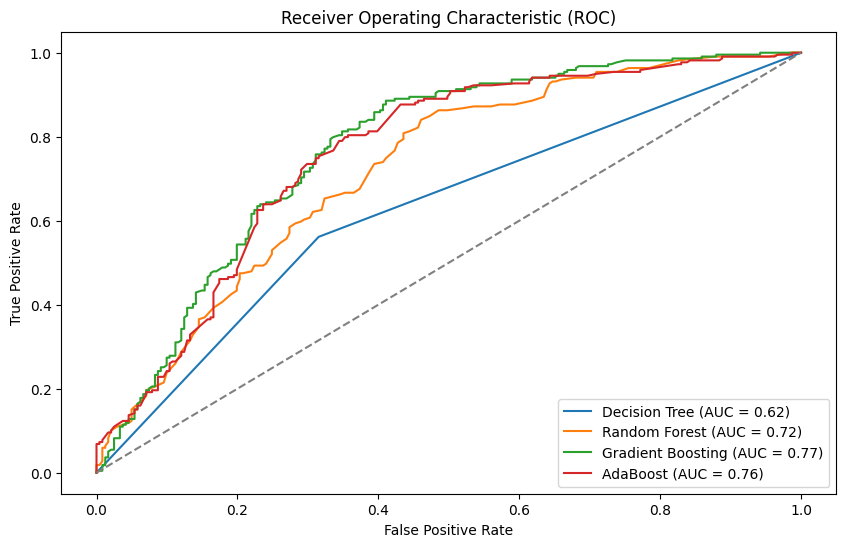

In [163]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
# Plot ROC curves
plt.figure(figsize=(10, 6))
for result in results:
    plt.plot(result['FPR'], result['TPR'], label=f"{result['Classifier']} (AUC = {result['AUC']:.2f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [147]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical


In [206]:
model = keras.Sequential([
    layers.Input(shape=(24,)),
    layers.Dense(10, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [207]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [171]:
X_train

array([[-0.41932185, -0.40365843,  1.02662044, ...,  0.09368427,
        -0.07012869, -0.06181392],
       [-0.8851992 , -0.40365843,  1.02662044, ...,  0.09368427,
        -0.07012869, -0.06181392],
       [ 0.20184796, -0.40365843,  1.02662044, ...,  0.09368427,
        -0.07012869, -0.06181392],
       ...,
       [-0.65226052, -0.40365843, -0.23369664, ...,  0.09368427,
        -0.07012869, -0.06181392],
       [-0.49696807, -2.06807063, -0.23369664, ...,  0.09368427,
        -0.07012869, -0.06181392],
       [-1.42872278, -0.40365843, -0.23369664, ...,  0.09368427,
        -0.07012869, -0.06181392]])

In [208]:
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2, verbose = 2)

Epoch 1/200
46/46 - 1s - 12ms/step - accuracy: 0.5241 - loss: 0.7835 - val_accuracy: 0.5870 - val_loss: 0.7197
Epoch 2/200
46/46 - 0s - 2ms/step - accuracy: 0.5860 - loss: 0.7040 - val_accuracy: 0.6413 - val_loss: 0.6709
Epoch 3/200
46/46 - 0s - 2ms/step - accuracy: 0.6288 - loss: 0.6553 - val_accuracy: 0.6685 - val_loss: 0.6400
Epoch 4/200
46/46 - 0s - 2ms/step - accuracy: 0.6485 - loss: 0.6243 - val_accuracy: 0.6766 - val_loss: 0.6218
Epoch 5/200
46/46 - 0s - 2ms/step - accuracy: 0.6608 - loss: 0.6036 - val_accuracy: 0.6766 - val_loss: 0.6077
Epoch 6/200
46/46 - 0s - 2ms/step - accuracy: 0.6730 - loss: 0.5887 - val_accuracy: 0.6821 - val_loss: 0.5979
Epoch 7/200
46/46 - 0s - 2ms/step - accuracy: 0.6805 - loss: 0.5776 - val_accuracy: 0.6793 - val_loss: 0.5920
Epoch 8/200
46/46 - 0s - 2ms/step - accuracy: 0.6778 - loss: 0.5690 - val_accuracy: 0.6739 - val_loss: 0.5883
Epoch 9/200
46/46 - 0s - 2ms/step - accuracy: 0.6859 - loss: 0.5629 - val_accuracy: 0.6793 - val_loss: 0.5849
Epoch 10/

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - accuracy: 0.6771 - loss: 0.6427
Test Loss: 0.6382119655609131, Test Accuracy: 0.6804347634315491


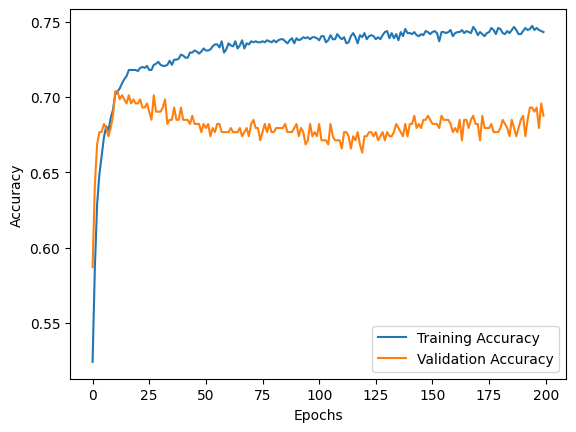

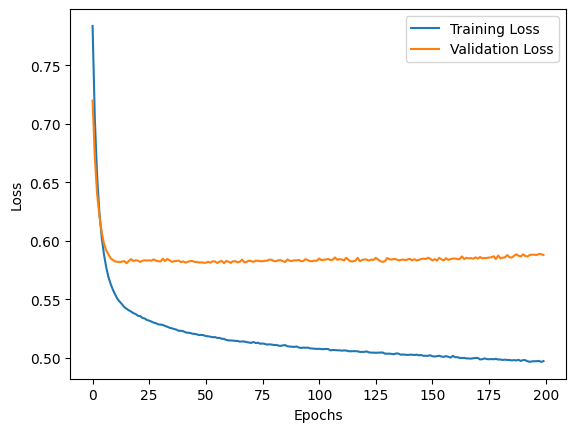

In [209]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# Plot training accuracy vs. test accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training loss vs. validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
